In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from scipy.stats import boxcox 

# 1] Problem Statement:

# 2] Data Gathering:

In [194]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [195]:
df = pd.read_csv("titanic.csv",usecols=['Pclass','Gender','Age','SibSp','Parch','Fare','Cabin','Embarked','Survived'])
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [196]:
Survived = df['Survived']
df.drop('Survived',axis=1,inplace=True)

In [197]:
df.insert(df.shape[1],'Survived',Survived)

In [198]:
df

,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,female,19.0,0,0,30.0000,B42,S,1
888,3,female,NaN,1,2,23.4500,NaN,S,0
889,1,male,26.0,0,0,30.0000,C148,C,1


# 3,4] EDA/Feature Engineering:

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Gender    891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [200]:
null_columns = [i for i in df.columns if df[i].isna().sum() > 0]
null_columns

['Age', 'Cabin', 'Embarked']

In [201]:
obj_columns = [i for i in df.columns if df[i].dtypes == 'O']
obj_columns

['Gender', 'Cabin', 'Embarked']

##### Imputing Missing Values:

##### 1] Age:

In [202]:
df['Age'].isna().sum()

177

<AxesSubplot: xlabel='Age', ylabel='Density'>

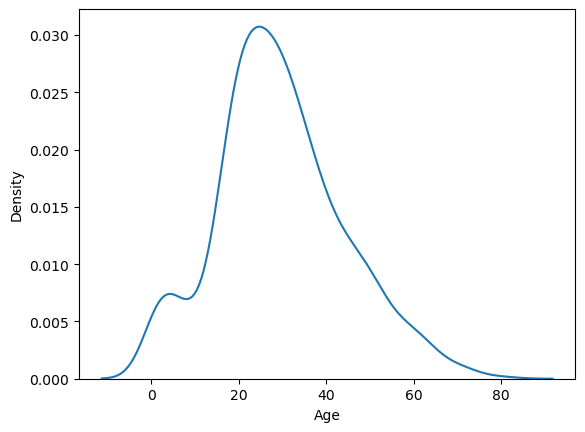

In [203]:
sns.kdeplot(df['Age'])

In [204]:
df['Age'].skew()

0.38910778230082704

In [205]:
df['Age'].mean()

29.69911764705882

<AxesSubplot: xlabel='Age'>

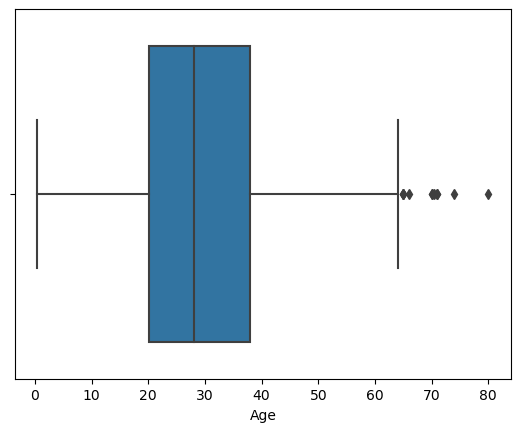

In [206]:
sns.boxplot(x = df['Age'])

In [207]:
# So there are some outliers in Age column so we have to impute it with median

age_median = df['Age'].median()
age_median

28.0

In [208]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [209]:
df['Age'].isna().sum()

0

##### 2] Cabin:

In [210]:
df['Cabin'].isna().sum()

687

In [211]:
df['Cabin'].isna().mean() * 100

77.10437710437711

In [212]:
# So in Cabin column we can see the missing value are greater than 10%-20% so we have to drop it.
df.drop('Cabin',axis=1,inplace=True)

##### 3] Embarked

In [213]:
df['Embarked'].isna().sum()

2

In [214]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [215]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [216]:
df.info() # No missing values is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Gender    891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


##### Changing the datatypes:

##### 1] Gender    

In [217]:
df['Gender'].value_counts().to_dict()

{'male': 577, 'female': 314}

In [218]:
df['Gender'].replace({'male': 1, 'female': 0},inplace=True)

##### 2] Embarked  

In [219]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [220]:
# So we dont know the order of Embarked so we can go with OHE

df = pd.get_dummies(df,columns=['Embarked'])

##### 3] Age:

In [221]:
df['Age'] = df['Age'].astype(int)

In [222]:
df.head(10)

,Pclass,Gender,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22,1,0,7.2500,0,0,0,1
1,1,0,38,1,0,71.2833,1,1,0,0
2,3,0,26,0,0,7.9250,1,0,0,1
3,1,0,35,1,0,53.1000,1,0,0,1
4,3,1,35,0,0,8.0500,0,0,0,1
5,3,1,28,0,0,8.4583,0,0,1,0
6,1,1,54,0,0,51.8625,0,0,0,1
7,3,1,2,3,1,21.0750,0,0,0,1
8,3,0,27,0,2,11.1333,1,0,0,1
9,2,0,14,1,0,30.0708,1,1,0,0


##### Handling Outliers:

##### 1] Age:

<AxesSubplot: xlabel='Age', ylabel='Density'>

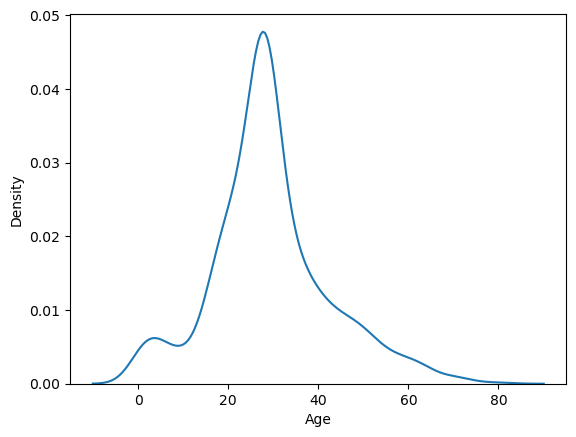

In [223]:
sns.kdeplot(df['Age'])

<AxesSubplot: xlabel='Age'>

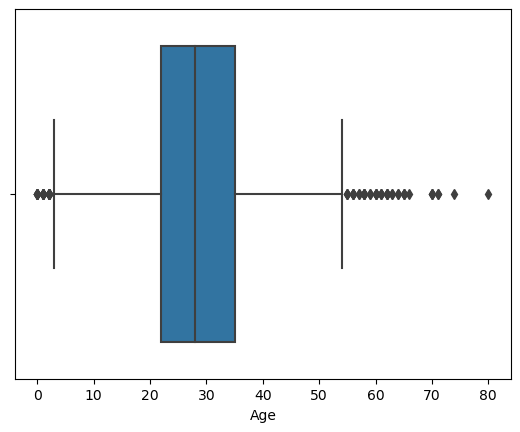

In [224]:
sns.boxplot(x = df['Age'])

##### 2] Fare:

<AxesSubplot: xlabel='Fare', ylabel='Density'>

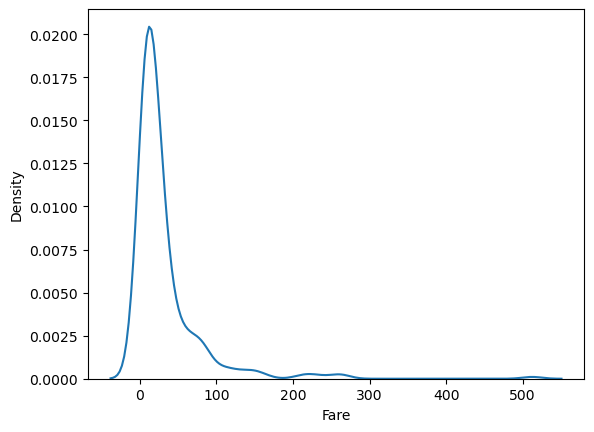

In [225]:
sns.kdeplot(df['Fare'])

<AxesSubplot: xlabel='Fare'>

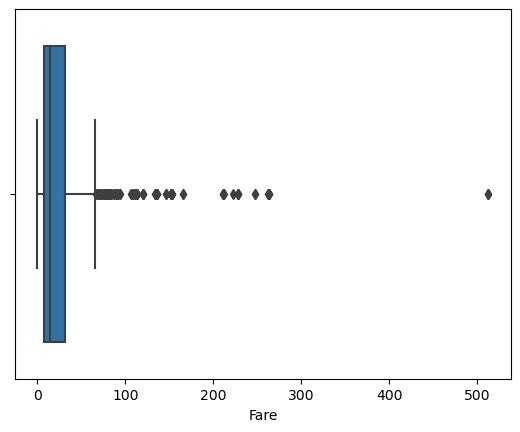

In [226]:
sns.boxplot(x = df['Fare'])

<AxesSubplot: xlabel='Fare'>

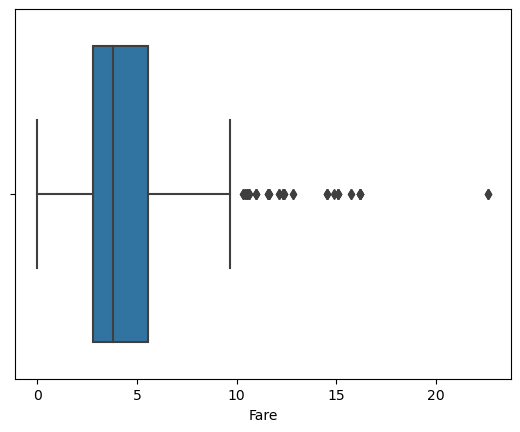

In [235]:
sns.boxplot(x = np.sqrt(df['Fare']))

In [236]:
df['Fare']  = np.sqrt(df['Fare'])
df['Fare']

0      2.692582
1      8.442944
2      2.815138
3      7.286975
4      2.837252
         ...   
886    3.605551
887    5.477226
888    4.842520
889    5.477226
890    2.783882
Name: Fare, Length: 891, dtype: float64

In [229]:
# So by using the square root transformation i have handled the outliers of Fare column

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Gender      891 non-null    int64  
 2   Age         891 non-null    int32  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Survived    891 non-null    int64  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int32(1), int64(5), uint8(3)
memory usage: 48.0 KB


# 5] Feature Selection:

##### 1] No Multicollinearity:

In [240]:
for i in range(df.shape[1]-4):
    vif = variance_inflation_factor(df,i)
    print(f"VIF for {df.columns[i]}:",vif)

VIF for Pclass: 2.4724571493044607
VIF for Gender: 1.5246110146889837
VIF for Age: 1.2587676025016528
VIF for SibSp: 1.3993140561196251
VIF for Parch: 1.3830263379282917
VIF for Fare: 2.476054979254659


# 6] Model Training:

In [241]:
x = df.drop('Survived',axis=1)
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [242]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

# 7] Evalution Matrix:

##### Evalution for Training Data

In [243]:
y_pred_train = log_reg.predict(x_train)
print("Confusion Matrix For Training Data:\n",confusion_matrix(y_train,y_pred_train))

Confusion Matrix For Training Data:
 [[371  66]
 [ 80 195]]


<Figure size 500x500 with 0 Axes>

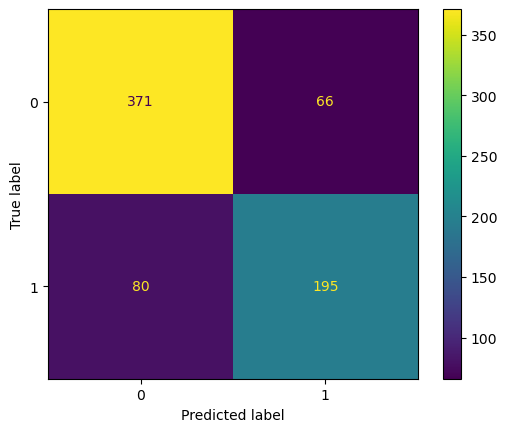

In [245]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(log_reg,x_train,y_train)

In [246]:
print("Classification Report for Training:\n",classification_report(y_train,y_pred_train))

Classification Report for Training:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       437
           1       0.75      0.71      0.73       275

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



##### Evalution for Test Data

In [247]:
y_pred_test = log_reg.predict(x_test)
print("Confusion Matrix For Test Data:\n",confusion_matrix(y_test,y_pred_test))

Confusion Matrix For Test Data:
 [[93 17]
 [18 51]]


In [248]:
print("Classification Report for Test:\n",classification_report(y_test,y_pred_test))

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



##### 2] Linearity

In [249]:
y_train_pred_prob = log_reg.predict_proba(x_train)

In [250]:
new_df = x_train.copy()

In [251]:
p = y_train_pred_prob[:,1]
log_odds = np.log(p/(1-p))
new_df['Log_Odds'] = log_odds

In [261]:
new_df.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1,inplace=True)

<AxesSubplot: >

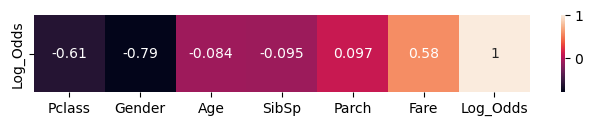

In [262]:
plt.figure(figsize=(8,1))
sns.heatmap(new_df.corr().tail(1),annot = True)

# 8] Web Framework:

In [278]:
col = x_train.columns.tolist()
col

['Pclass',
 'Gender',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [279]:
project_data = {'Gender':{'male': 1, 'female': 0},
                'Columns':col}

In [280]:
project_data['Columns'].index('Embarked_S')

8

In [287]:
Pclass = 2.000000
Gender = 'male'
Age = 23
SibSp = 0
Parch = 0
Fare = 27
Embarked = 'S'

Gender = project_data['Gender'][Gender]

Embarked = 'Embarked_' + Embarked
index = project_data['Columns'].index(Embarked)

columns = len(project_data['Columns'])
test_array = np.zeros(columns)
test_array[0] = Pclass
test_array[1] = Gender
test_array[2] = Age
test_array[3] = SibSp 
test_array[4] = Parch
test_array[5] = np.sqrt(Fare)
test_array[index] = 1

def get_prediction(x):
    predict_value = log_reg.predict([x])[0]
    print("The Prediction is:",predict_value)
    
get_prediction(test_array)    


The Prediction is: 0


In [288]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(log_reg,f)

In [289]:
import json

with open('project_data','w') as f:
    json.dump(project_data,f)